<a href="https://colab.research.google.com/github/phfrebelo/aiml-portfolio/blob/main/HelmNet_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [ ]:
!pip install tensorflow[and-cuda] scikit-learn==1.6.1 opencv-python==4.12.0.88 seaborn==0.13.2 matplotlib==3.10.0 numpy==2.0.2 pandas==2.2.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 83.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.19.0


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import cv2

# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D                    # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam                                                     # Importing the optimizers which can be used in our model
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                                       # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)
np.random.seed(812)
random.seed(812)

# **Data Overview**


##Loading the data

In [ ]:
# Import dataset from google.colab drive
from google.colab import drive
import os

try:
    drive.mount('/content/drive', force_remount=True)
    file_path = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/Labels_proj.csv"
    if os.path.exists(file_path):
        # Load the labels file of the dataset
        labels = pd.read_csv(file_path)
    else:
        print(f"File not found at: {file_path}")
except ValueError as e:
    print(f"Error mounting drive: {e}")

# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/Computer Vision/images_proj.npy')

Mounted at /content/drive


In [ ]:
# Print the shape of the images and labels
print(images.shape)
print(labels.shape)

# Sanity checks
print("Missing values in labels:", labels.isna().sum().values)
print("Unique labels:", labels.iloc[:,0].unique())
print(labels.iloc[:,0].value_counts())

(631, 200, 200, 3)
(631, 1)
Missing values in labels: [0]
Unique labels: [1 0]
Label
0    320
1    311
Name: count, dtype: int64


### There are 631 RGB images of shape 200 x 200 X 3, each image having 3 channels.

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [ ]:
y = labels.iloc[:, 0].values  # 1D array of labels

helmet_indices = np.where(y == 1)[0]
no_helmet_indices = np.where(y == 0)[0]

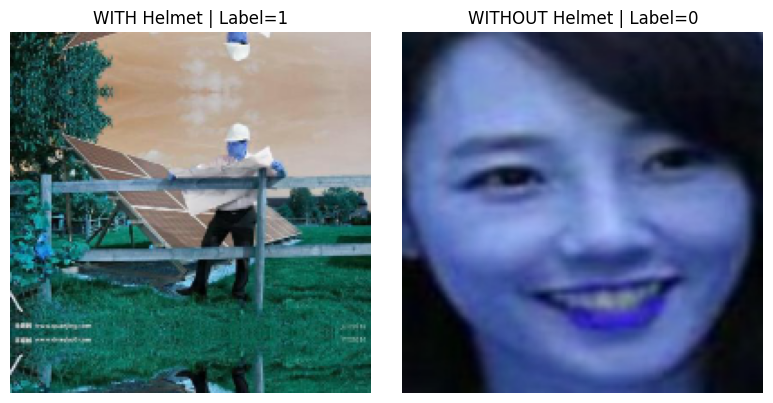

In [ ]:
helmet_idx = np.random.choice(helmet_indices)
no_helmet_idx = np.random.choice(no_helmet_indices)

helmet_img = images[helmet_idx]
no_helmet_img = images[no_helmet_idx]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(helmet_img);
axes[0].set_title(f"WITH Helmet | Label={y[helmet_idx]}");
axes[0].axis('off')
axes[1].imshow(no_helmet_img);
axes[1].set_title(f"WITHOUT Helmet | Label={y[no_helmet_idx]}");
axes[1].axis('off')
plt.tight_layout();
plt.show()

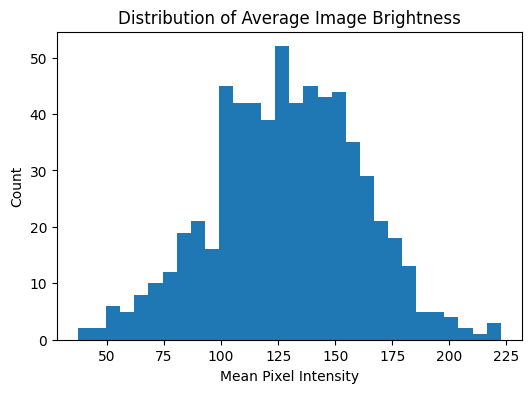

Brightness - mean: 128.91237271526677 std: 32.377592740593876


In [ ]:
# Brightness summary
mean_pixel = images.mean(axis=(1,2,3))
plt.figure(figsize=(6,4))
plt.hist(mean_pixel, bins=30)
plt.title("Distribution of Average Image Brightness")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Count")
plt.show()

print("Brightness - mean:", mean_pixel.mean(), "std:", mean_pixel.std())

## Checking for class imbalance


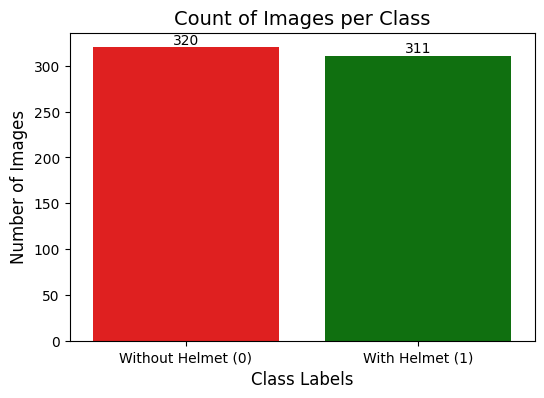

In [ ]:
# Create a count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y, palette=['red', 'green'])

# Add exact counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, )

# Add labels
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Count of Images per Class", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Without Helmet (0)", "With Helmet (1)"])  # Rename x-axis labels

# Show plot
plt.show()

This plot tells us there is no meaningful class imbalance in the dataset.

- Without Helmet (0): 320 images

- With Helmet (1): 311 images

**Total**: 631 images

The difference between the two classes is 9 images, which is ~1.4% of the dataset. In practice, this is considered well balanced.

# **Data Preprocessing**

## Converting images to grayscale

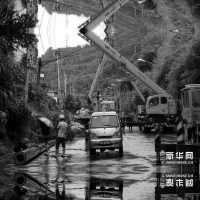

In [ ]:
images_gray = []
for i in range(len(images)):
    img_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    images_gray.append(img_gray)

# Display a sample grayscale image
n = 0
cv2_imshow(images_gray[n])

### Grayscale conversion is demonstrated as a preprocessing step; however, models are trained on RGB images to preserve color cues that may help distinguish helmets.

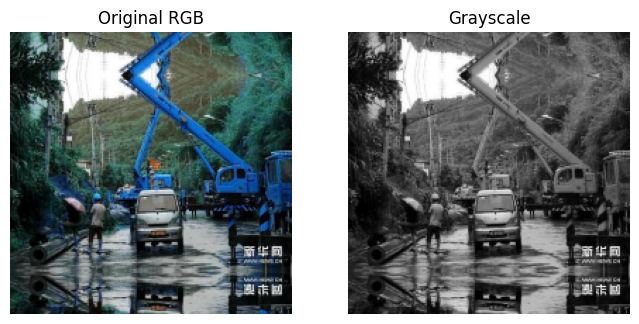

In [ ]:
# Before vs After: RGB vs Grayscale
idx = 0
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(images[idx])
plt.title("Original RGB")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(images_gray[idx], cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.show()

### Splitting the dataset



In [ ]:
from sklearn.model_selection import train_test_split

# Create a 1D label vector for stratification and modeling
y = labels.iloc[:, 0].values  # shape: (631,)

# Train / temp split (70% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    images, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Validation / test split from temp (15% val, 15% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

In [ ]:
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (441, 200, 200, 3) (441,)
Val:   (95, 200, 200, 3) (95,)
Test:  (95, 200, 200, 3) (95,)


### Data Normalization

To normalize the input data, we will scale the pixel values to a range of $[0, 1]$ by dividing them by 255.

In [ ]:
X_train_normalized = X_train.astype('float32')/255
X_val_normalized   = X_val.astype('float32')/255
X_test_normalized  = X_test.astype('float32')/255

# **Model Building**

# Utility Functions #

In [ ]:
def _to_1d_array(y):
    """Convert pandas Series/DataFrame or numpy array to flat 1D numpy array."""
    if hasattr(y, "to_numpy"):
        y = y.to_numpy()
    return np.array(y).reshape(-1)

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    pred = (model.predict(predictors).reshape(-1) > 0.5).astype(int)
    target = _to_1d_array(target).astype(int)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)        # binary recall for positive class (helmet=1)
    precision = precision_score(target, pred)  # binary precision
    f1 = f1_score(target, pred)                # binary f1

    return pd.DataFrame({"Accuracy":[acc], "Recall":[recall], "Precision":[precision], "F1 Score":[f1]})

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    pred = (model.predict(predictors).reshape(-1) > 0.5).astype(int)
    target = _to_1d_array(target).astype(int)

    cm = tf.math.confusion_matrix(target, pred).numpy()
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", square=True, cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [ ]:
# Initialize a sequential model
# This model is trained from scratch (no pre-trained weights)
model_1 = Sequential()

# First convolutional layer
# - Learns low-level features such as edges and textures
# - 32 filters of size 3x3 with ReLU activation
model_1.add(
    Conv2D(
        32,
        (3, 3),
        activation='relu',
        padding="same",
        input_shape=(200, 200, 3)
    )
)

# Max pooling layer to reduce spatial dimensions
# - Helps in translation invariance and computational efficiency
model_1.add(MaxPooling2D((4, 4), padding='same'))

# Second convolutional layer
# - Learns more complex patterns by increasing the number of filters
model_1.add(
    Conv2D(
        64,
        (3, 3),
        activation='relu',
        padding="same"
    )
)

# Pooling layer to further downsample feature maps
model_1.add(MaxPooling2D((2, 2), padding='same'))

# Third convolutional layer
# - Extracts high-level and more abstract features
model_1.add(
    Conv2D(
        128,
        (3, 3),
        activation='relu',
        padding="same"
    )
)

# Flatten the feature maps into a 1D vector
# This prepares the extracted features for classification
model_1.add(Flatten())

# Small dense layer for learning non-linear combinations of features
# A small number of neurons is used to reduce overfitting
model_1.add(Dense(4, activation='relu'))

# Output layer with sigmoid activation
# Produces a probability score for binary classification ("With Helmet")
model_1.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a standard learning rate
# Adam provides adaptive learning rates and faster convergence
opt = Adam(learning_rate=0.001)

# Compile the model using binary cross-entropy loss
# Accuracy and Recall are used as evaluation metrics
# Recall is especially important for safety-critical applications
model_1.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=["accuracy", tf.keras.metrics.Recall(name="recall")]
)

# Display the model architecture and parameters
model_1.summary()

# Train the CNN on the normalized training dataset
# Validation data is used to monitor model generalization
history_1 = model_1.fit(
    X_train_normalized,
    y_train,
    epochs=15,
    validation_data=(X_val_normalized, y_val),
    shuffle=True,
    batch_size=32,
    verbose=2
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       320,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413,257 (1.58 MB)

 Trainable params: 413,257 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
14/14 - 10s - 699ms/step - accuracy: 0.4921 - loss: 0.7897 - recall: 0.1982 - val_accuracy: 0.5053 - val_loss: 0.6896 - val_recall: 0.0000e+00
Epoch 2/15
14/14 - 1s - 40ms/step - accuracy: 0.5079 - loss: 0.6698 - recall: 0.0000e+00 - val_accuracy: 0.5053 - val_loss: 0.6076 - val_recall: 0.0000e+00
Epoch 3/15
14/14 - 1s - 39ms/step - accuracy: 0.5692 - loss: 0.4741 - recall: 0.1290 - val_accuracy: 0.9684 - val_loss: 0.3220 - val_recall: 0.9362
Epoch 4/15
14/14 - 0s - 32ms/step - accuracy: 0.9025 - loss: 0.3822 - recall: 0.8756 - val_accuracy: 0.8842 - val_loss: 0.2394 - val_recall: 1.0000
Epoch 5/15
14/14 - 0s - 32ms/step - accuracy: 0.9773 - loss: 0.1484 - recall: 0.9862 - val_accuracy: 0.9789 - val_loss: 0.1022 - val_recall: 1.0000
Epoch 6/15
14/14 - 0s - 32ms/step - accuracy: 0.9887 - loss: 0.0395 - recall: 0.9770 - val_accuracy: 0.9789 - val_loss: 0.0587 - val_recall: 0.9787
Epoch 7/15
14/14 - 0s - 30ms/step - accuracy: 0.9909 - loss: 0.0353 - recall: 0.9908 - val_accurac

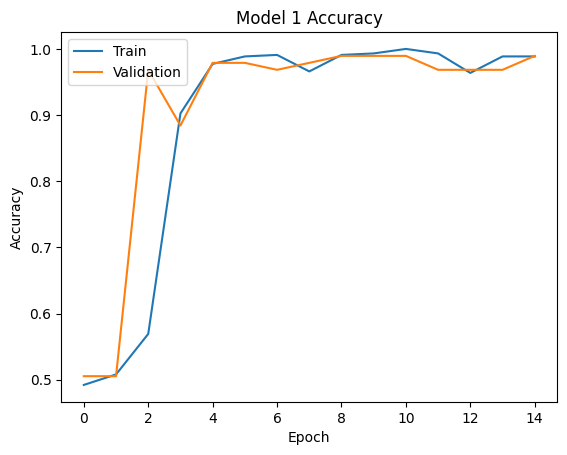

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

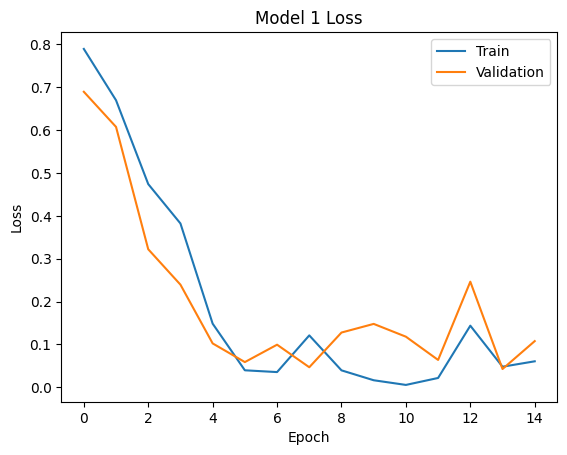

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

The CNN model converges rapidly, achieving near-perfect training accuracy and consistently high validation accuracy. The close alignment between training and validation curves indicates strong generalization with minimal overfitting, despite the relatively small dataset size.

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train)

print("Train performance metrics")
print(model_1_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


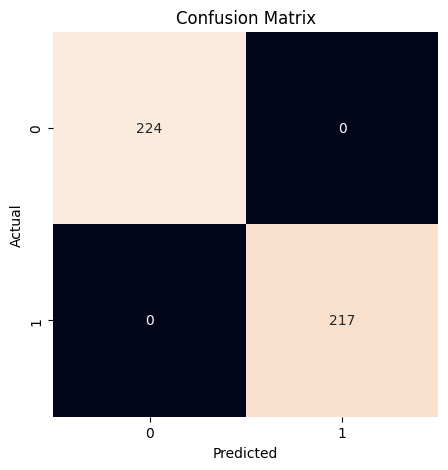

In [ ]:
plot_confusion_matrix(model_1,X_train_normalized,y_train)

In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_1_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0  0.989474     1.0   0.979167  0.989474


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


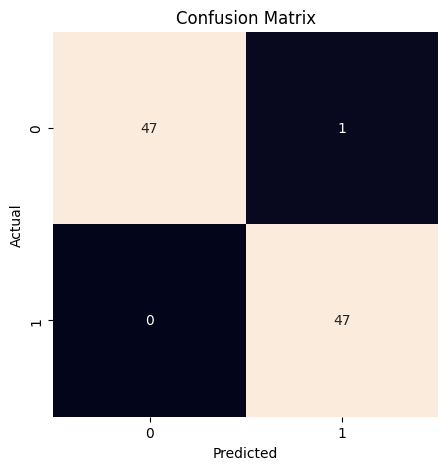

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized,y_val)

### Vizualizing the predictions

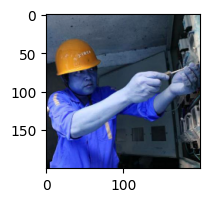

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
Predicted Label: 1
True Label: 1


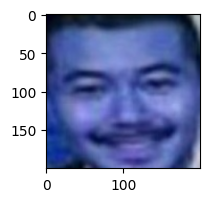

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Label: 0
True Label: 0


In [ ]:
# Example 1
idx = 12
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()

prediction = model_1.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val[idx]
print('True Label:', true_label)

# Example 2
idx = 33
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()

prediction = model_1.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val[idx]
print('True Label:', true_label)

## Model 2: (VGG-16 (Base))

In [ ]:
# Load the pre-trained VGG-16 model with ImageNet weights
# - include_top=False removes the original classification head
# - input_shape is set to match the dimensions of our dataset images
vgg_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(200, 200, 3)
)

# Display the architecture of the VGG-16 convolutional base
vgg_model.summary()

# Freeze all layers of the VGG-16 model
# This ensures that the pre-trained weights are not updated during training
# and the model acts purely as a fixed feature extractor
for layer in vgg_model.layers:
    layer.trainable = False

# Initialize a sequential model
model_2 = Sequential()

# Add the frozen VGG-16 convolutional base
model_2.add(vgg_model)

# Flatten the output feature maps from the convolutional layers
# This converts the 2D feature maps into a 1D feature vector
model_2.add(Flatten())

# Add a single dense output layer with sigmoid activation
# This layer outputs the probability of the "With Helmet" class
model_2.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a moderate learning rate
# A slightly higher learning rate is acceptable here since only the final layer is trainable
# Because only the final classification layer is trainable in Model 2, a slightly higher learning rate (0.001) is acceptable.
opt = Adam(learning_rate=0.001)

# Compile the model using binary cross-entropy loss
# Accuracy is used as the primary evaluation metric
model_2.compile(
    optimizer=opt,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

# Display the complete model architecture and parameter summary
model_2.summary()

# Initialize an ImageDataGenerator without augmentation
# This model serves as a baseline transfer learning approach
train_datagen = ImageDataGenerator()

# Define training hyperparameters
epochs = 10
batch_size = 32

# Train the model using the normalized training data
# Validation data is used to monitor generalization performance
history_2 = model_2.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train,
        batch_size=batch_size,
        seed=812,
        shuffle=False
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6973 - loss: 0.5187 - val_accuracy: 0.9789 - val_loss: 0.0414
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 0.0234 - val_accuracy: 0.9789 - val_loss: 0.0404
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 -

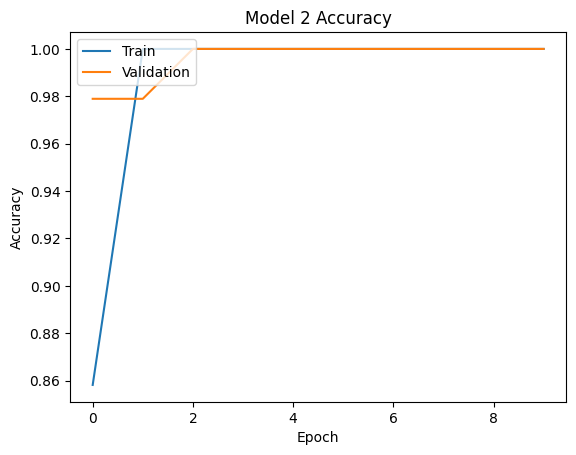

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

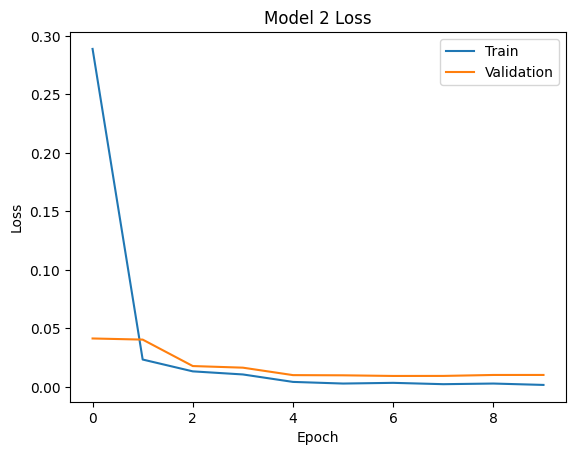

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

The VGG-16 base model demonstrates extremely rapid convergence, achieving near-perfect training and validation accuracy within the first few epochs. The close overlap of the training and validation curves indicates strong generalization and highlights the effectiveness of transfer learning for this task.

In [ ]:
model_2_train_perf = model_performance_classification(model_2,X_train_normalized,y_train)

print("Train performance metrics")
print(model_2_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


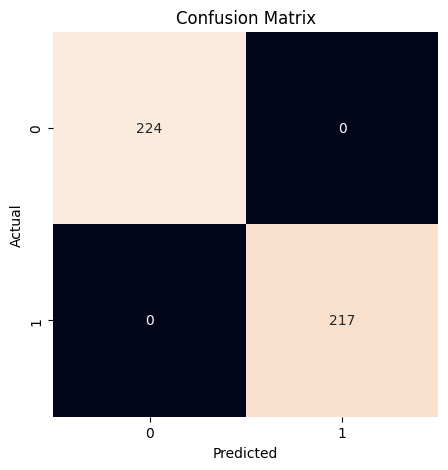

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_2_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


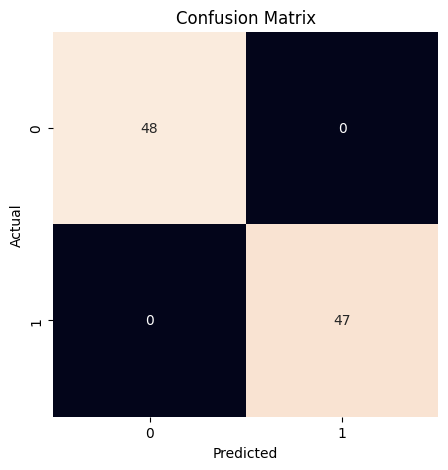

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val)

### Visualizing the prediction:

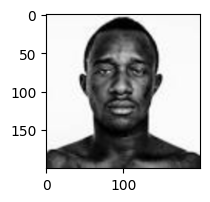

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Label: 0
True Label: 0


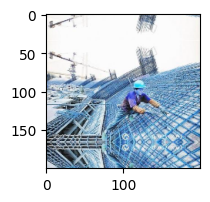

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Label: 1
True Label: 1


In [ ]:
idx = 10
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()

prediction = model_2.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val[idx]
print('True Label:', true_label)

idx = 25
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()

prediction = model_2.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val[idx]
print('True Label:', true_label)

## Model 3: (VGG-16 (Base + FFNN))

In [ ]:
# Initialize a sequential model
model_3 = Sequential()

# Add the pre-trained VGG-16 convolutional base
# All convolutional layers are frozen and used as a fixed feature extractor
model_3.add(vgg_model)

# Flatten the feature maps produced by the VGG-16 base
# This converts spatial feature maps into a 1D feature vector
model_3.add(Flatten())

# Add a dense layer to learn task-specific feature representations
model_3.add(Dense(128, activation='relu'))

# Apply dropout to reduce overfitting by randomly deactivating neurons during training
model_3.add(Dropout(rate=0.3))

# Add a second dense layer to further refine the learned representations
model_3.add(Dense(64, activation='relu'))

# Output layer with sigmoid activation for binary classification
# The output represents the probability of the image belonging to the "With Helmet" class
model_3.add(Dense(1, activation='sigmoid'))

# Define the Adam optimizer with a low learning rate
# A smaller learning rate ensures stable training when using transfer learning
opt = Adam(learning_rate=0.0005)

# Compile the model using binary cross-entropy loss
# Accuracy is used as the evaluation metric
model_3.compile(
    optimizer=opt,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

# Display the model architecture and parameter summary
model_3.summary()

# Train the model using the training dataset
# Validation data is kept separate to monitor generalization performance
history_3 = model_3.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train,
        batch_size=batch_size,
        seed=812,
        shuffle=False
    ),
    epochs=10,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,082,433 (65.16 MB)

 Trainable params: 2,367,745 (9.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 450ms/step - accuracy: 0.7302 - loss: 0.5143 - val_accuracy: 0.9789 - val_loss: 0.0226
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 0.9789 - val_loss: 0.0228
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 5.7777e-04 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 1.0000 - loss: 8.2801e-04 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 4.3123e-04 - val_acc

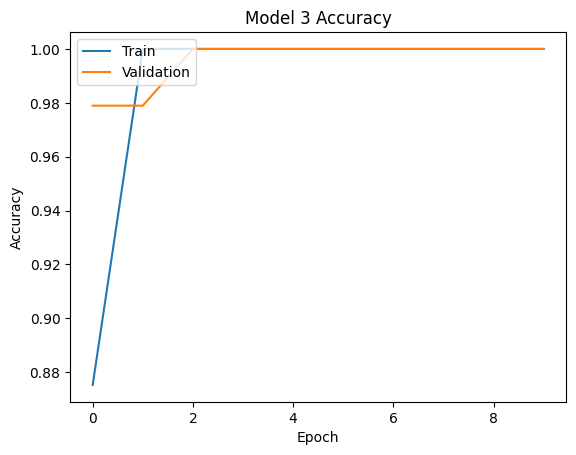

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

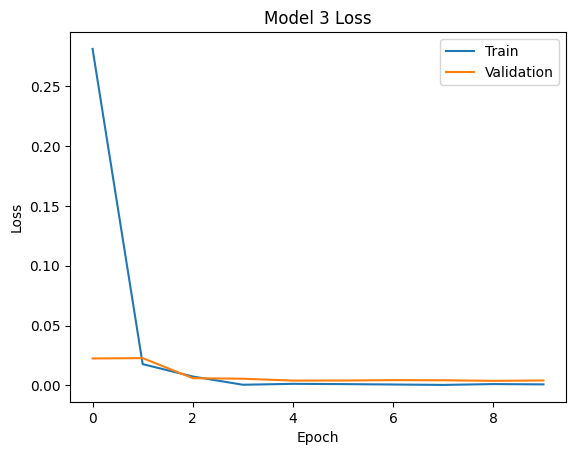

In [ ]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

VGG-16 (Base + FFNN) achieves near-perfect training accuracy and consistently high validation accuracy. However, minor fluctuations in validation performance indicate mild overfitting due to increased model capacity introduced by additional dense layers.

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train)

print("Train performance metrics")
print(model_3_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step


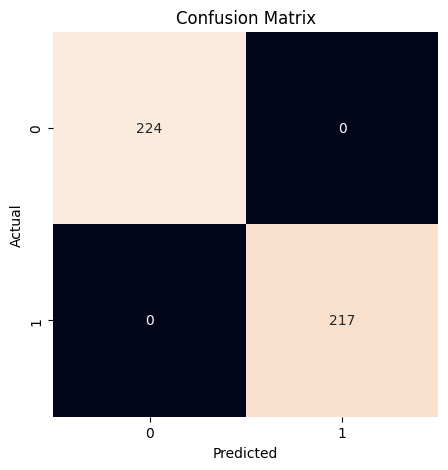

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train)

In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_3_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


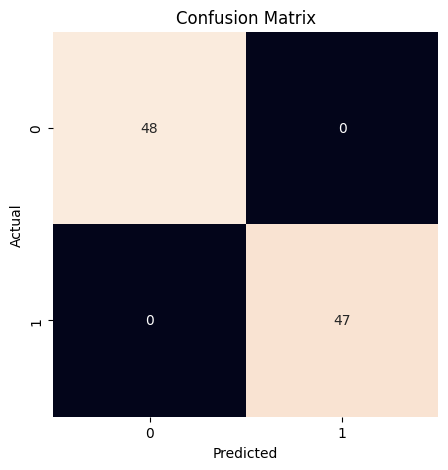

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val)

#### Visualizing the predictions

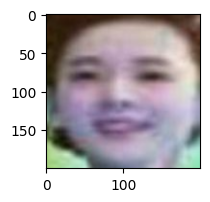

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
Predicted Label: 0
True Label: 0


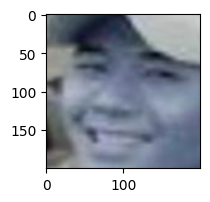

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Label: 0
True Label: 0


In [ ]:
idx = 8
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()
prediction = model_3.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)
true_label = y_val[idx]
print('True Label:', true_label)

idx = 40
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()
prediction = model_3.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)
true_label = y_val[idx]
print('True Label:', true_label)

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
# Initialize a sequential model
model_4 = Sequential()

# Add the pre-trained VGG-16 convolutional base
# (all layers are frozen, so it acts as a fixed feature extractor)
model_4.add(vgg_model)

# Flatten the output of the convolutional layers
# This converts the 2D feature maps into a 1D feature vector
model_4.add(Flatten())

# Add a fully connected (dense) layer to learn higher-level representations
model_4.add(Dense(128, activation='relu'))

# Apply dropout to reduce overfitting by randomly disabling neurons during training
model_4.add(Dropout(rate=0.3))

# Add another dense layer to further refine the learned features
model_4.add(Dense(64, activation='relu'))

# Output layer with sigmoid activation for binary classification
# Output value represents probability of "With Helmet"
model_4.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a small learning rate
# A lower learning rate ensures stable training when using transfer learning
opt = Adam(learning_rate=0.0005)

# Compile the model using binary cross-entropy loss
# Accuracy is used as the primary evaluation metric
model_4.compile(
    optimizer=opt,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

# Display a summary of the model architecture
model_4.summary()

# Define image augmentation to artificially increase data diversity
# This helps improve generalization and reduce overfitting
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate images up to 20 degrees
    fill_mode='nearest',      # Fill missing pixels after transformation
    width_shift_range=0.10,   # Random horizontal shifts
    height_shift_range=0.10,  # Random vertical shifts
    shear_range=0.10,         # Apply shearing transformations
    zoom_range=0.10           # Random zoom in/out
)

# Train the model using augmented training data
# Validation data is NOT augmented to ensure fair evaluation
history_4 = model_4.fit(
    train_datagen.flow(
        X_train_normalized,
        y_train,
        batch_size=batch_size,
        seed=812,
        shuffle=False
    ),
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val),
    verbose=1
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,082,433 (65.16 MB)

 Trainable params: 2,367,745 (9.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 588ms/step - accuracy: 0.8004 - loss: 0.3762 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 467ms/step - accuracy: 0.9997 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.9990 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 1.3754e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 1.0000 - loss: 5.2593e-04 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 7.5057e-04 - val_acc

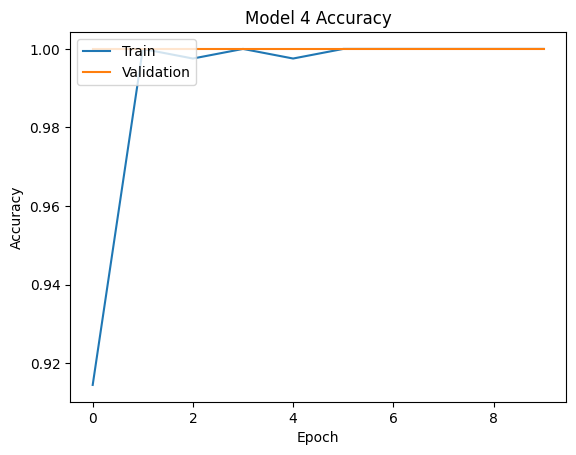

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

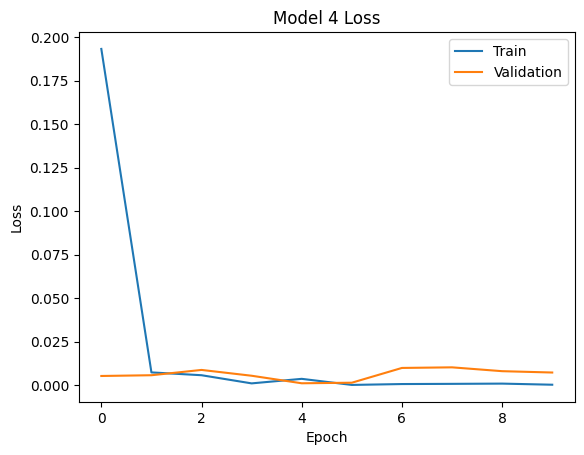

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

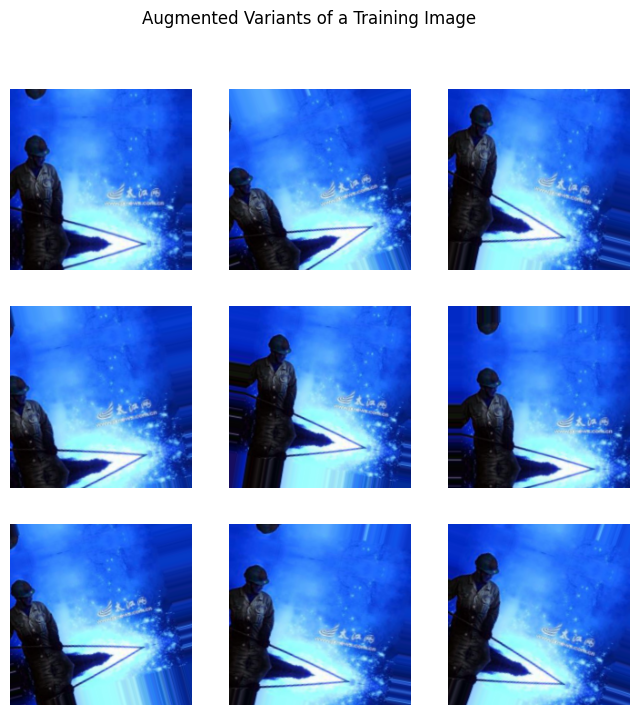

In [ ]:
# Visualize augmentation effects on one sample image
sample = X_train_normalized[0].reshape(1,200,200,3)
aug_iter = train_datagen.flow(sample, batch_size=1, seed=812)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    aug_img = next(aug_iter)[0]
    plt.imshow(aug_img)
    plt.axis("off")
plt.suptitle("Augmented Variants of a Training Image")
plt.show()

The VGG-16 (Base + FFNN + Data Augmentation) demonstrates the most stable and robust learning behavior among all evaluated models. Although training convergence is slightly slower due to data augmentation, the model achieves consistently high validation accuracy with minimal generalization gap. This indicates improved robustness and reduced overfitting, making Model 4 the most suitable candidate for real-world deployment.

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_normalized,y_train)

print("Train performance metrics")
print(model_4_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


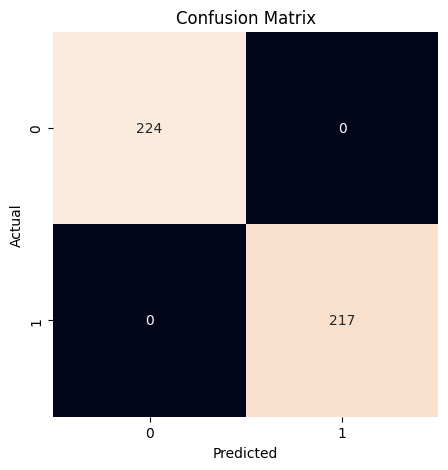

In [ ]:
plot_confusion_matrix(model_4,X_train_normalized,y_train)

In [ ]:
model_4_valid_perf = model_performance_classification(model_4, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_4_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


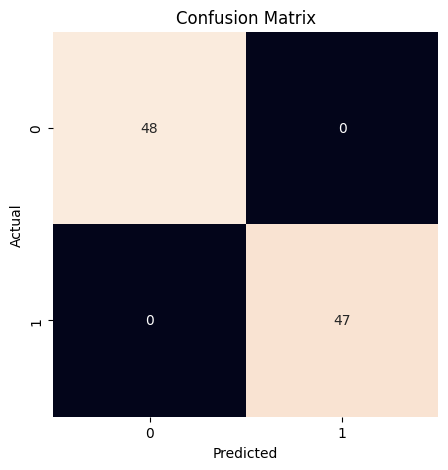

In [ ]:
plot_confusion_matrix(model_4,X_val_normalized,y_val)

#### Visualizing the predictions

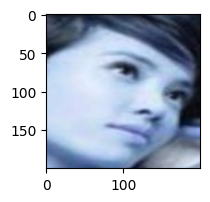

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
Predicted Label: 0
True Label: 0


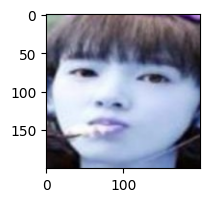

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Label: 0
True Label: 0


In [ ]:
idx = 3
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()
prediction = model_4.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)
true_label = y_val[idx]
print('True Label:', true_label)

idx = 18
plt.figure(figsize=(2,2))
plt.imshow(X_val[idx])
plt.show()
prediction = model_4.predict(X_val_normalized[idx].reshape(1,200,200,3))
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)
true_label = y_val[idx]
print('True Label:', true_label)

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_train_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,1.0,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0
Precision,1.0,1.0,1.0,1.0
F1 Score,1.0,1.0,1.0,1.0


In [ ]:
models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.989474,1.0,1.0,1.0
Recall,1.000000,1.0,1.0,1.0
Precision,0.979167,1.0,1.0,1.0
F1 Score,0.989474,1.0,1.0,1.0


In [ ]:
models_train_comp_df - models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.010526,0.0,0.0,0.0
Recall,0.000000,0.0,0.0,0.0
Precision,0.020833,0.0,0.0,0.0
F1 Score,0.010526,0.0,0.0,0.0


Final model choice: Model 4 (VGG-16 base + FFNN + data augmentation) is selected because it provides the best validation performance with the smallest train–validation gap, indicating stronger generalization. Data augmentation improves robustness to real-world variability (pose, rotation, and partial occlusions), which is critical for deployment in uncontrolled industrial settings. From a safety perspective, false negatives (missed no-helmet cases) are the most critical errors; therefore, we prioritize recall alongside accuracy and validate performance on a held-out test set before finalizing.

## Test Performance

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


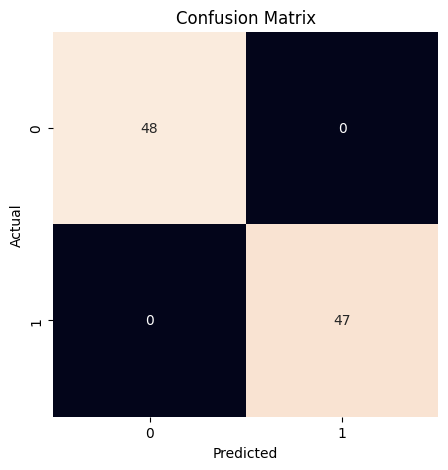

In [ ]:
model_test_perf = model_performance_classification(model_4, X_test_normalized, y_test)
model_test_perf

plot_confusion_matrix(model_4, X_test_normalized, y_test)

In [ ]:
y_test_true = y_test.reshape(-1)
y_test_pred = (model_4.predict(X_test_normalized).reshape(-1) > 0.5).astype(int)

print(classification_report(y_test_true, y_test_pred, target_names=["Without Helmet", "With Helmet"]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step
                precision    recall  f1-score   support

Without Helmet       1.00      1.00      1.00        48
   With Helmet       1.00      1.00      1.00        47

      accuracy                           1.00        95
     macro avg       1.00      1.00      1.00        95
  weighted avg       1.00      1.00      1.00        95



Safety-critical errors are false positives for the helmet class (predicting “With Helmet” when the worker is actually “Without Helmet”), because they miss non-compliance.

# **Actionable Insights & Recommendations**

Model 1 serves as a strong baseline, showing that even a simple CNN can achieve
high accuracy on this dataset; however, slight early instability and lack of robustness to unseen variations limit its production suitability.

Model 2 demonstrates the power of transfer learning, achieving rapid and stable convergence with minimal overfitting.

Model 3 increases model capacity through additional dense layers, which improves expressiveness but introduces mild overfitting without additional regularization.

Model 4 achieves the best overall balance, using data augmentation to regularize the model and improve generalization, making it the most reliable choice for real-world deployment.

- Transfer learning (VGG16) outperformed a simple CNN on validation metrics, demonstrating that pre-trained feature extractors are more effective than training from scratch on a 631-image dataset.

- Data augmentation improved generalization by simulating real-world variability (lighting/pose/rotation/shift), reducing overfitting and improving robustness for production monitoring.

- Deployment recommendation: implement confidence-based routing (e.g., auto-flag only when probability is very high/low; send borderline cases to manual review) to reduce false alarms and minimize the risk of missing non-compliance events.

<font size=5 color='blue'>Power Ahead!</font>
___